In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
Species = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
df=df.replace(Species)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [10]:
df.drop('Id',axis=1,inplace=True)

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [40]:
df.loc[['SepalWidthCm']==3]

KeyError: 'False: boolean label can not be used without a boolean index'

In [12]:
x=df.drop('Species',axis=1)
y=df['Species']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=101)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)


In [16]:
from sklearn.naive_bayes import GaussianNB
gb= GaussianNB()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
ypred

array([1, 1, 1, 3, 3, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3, 2, 2, 2, 1, 3, 2, 1,
       2, 2, 2, 2, 2, 3, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 1, 1, 1, 3,
       2], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,ypred)
cm

array([[13,  0,  0],
       [ 0, 17,  3],
       [ 0,  0, 12]], dtype=int64)

<Axes: >

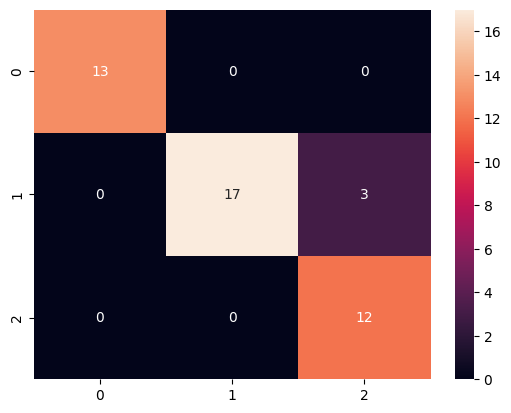

In [19]:
sns.heatmap(cm,annot=True)

In [22]:
cf = classification_report(ytest,ypred)
print(cf)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.85      0.92        20
           3       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45

